# **VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX**
*Mariana Manzano Rico*

*A01735770*

*Minería de Datos*

## **Introducción**

Determinar el precio de una casa puede convertirse en una tarea compleja, ya que implica tener un conocimiento profundo de los valores de mercado, los costos asociados a la propiedad y considerar diversos factores como el tamaño de la casa, la ubicación, las amenidades disponibles, entre otros. A pesar de la complejidad, esta tarea es esencial, ya que establecer un precio demasiado alto puede alejar a posibles compradores, prolongando innecesariamente la permanencia de la propiedad en el mercado. Por otro lado, fijar un precio adecuado es crucial para atraer compradores potenciales y asegurar una venta exitosa (BBVA, s.f.).

En este reporte, se emplean VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX. Se utilizan diversas técnicas estadísticas, como regresión lineal, árboles de decisión y redes neuronales, para determinar los precios por metro cuadrado de diversas propiedades en la Ciudad de México. Estas herramientas analíticas permiten una evaluación más precisa y fundamentada, proporcionando a Erich Zann y Asociados una ventaja estratégica en el competitivo mercado inmobiliario de la CDMX.

In [1]:
#Librerías
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Para ello, vamos a conocer la base de datos con la que entrenaremos los modelos, que pueden ver en la siguiente imagen.

In [2]:
#Carga de archivos
inmu = pd.read_csv("Clusters.csv")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           657 non-null    int64  
 1   Alcaldia             657 non-null    object 
 2   Colonia              657 non-null    object 
 3   X1                   657 non-null    float64
 4   X2                   657 non-null    float64
 5   X3                   657 non-null    float64
 6   X4                   657 non-null    float64
 7   X5                   657 non-null    float64
 8   X6                   657 non-null    float64
 9   X7                   657 non-null    float64
 10  X8                   657 non-null    float64
 11  X9                   657 non-null    float64
 12  X10                  657 non-null    float64
 13  Cocina_equip         657 non-null    int64  
 14  Gimnasio             657 non-null    int64  
 15  Amueblado            657 non-null    int

Esta cuenta con las siguientes variables:

1. **Alcaldía:** Indica la demarcación administrativa dentro de la Ciudad de México donde se encuentra ubicado el inmueble.

2. **Colonia:** Hace referencia al nombre de la zona o vecindario específico donde se localiza la propiedad.

3. **Cocina Equipada:** Indica si la vivienda cuenta con una cocina equipada con electrodomésticos y utensilios básicos.

4. **Gimnasio:** Refiere a la presencia o ausencia de instalaciones deportivas o gimnasio en el inmueble.

5. **Amueblado:** Indica si la propiedad se ofrece en venta con muebles incluidos.

6. **Alberca:** Se refiere a la presencia o ausencia de una piscina en el lugar.

7. **Terraza:** Indica si la propiedad cuenta con un espacio al aire libre, como una terraza o balcón.

8. **Elevador:** Señala si el edificio o complejo inmobiliario dispone de ascensores para acceder a los diferentes niveles.

9. **m2 Construido:** Representa los metros cuadrados de construcción total de la propiedad.

10. **Baños:** Número de baños presentes en la vivienda.

11. **Recámaras:** Indica la cantidad de habitaciones destinadas para dormir en la propiedad.

12. **Lugares de Estacionamiento:** Número de espacios designados para estacionar vehículos.

13. **Precio por m2:** Costo por metro cuadrado de la propiedad, un indicador clave para la valoración inmobiliaria y nuestra variable objetivo en los modelos.

14. **Cluster Labels:** Etiquetas asignadas a los conglomerados obtenidos mediante técnicas de análisis de conglomerados.

15. **Conglomerados:** Agrupaciones resultantes del análisis de conglomerados que clasifican las propiedades según características similares.

16. **Nivel Socioeconómico:** Clasificación del nivel socioeconómico de la zona donde se encuentra la propiedad, derivada del análisis de diversas variables socioeconómicas.

17. **X1:** Poblacion de 15 años o mas analfabeta

18. **X2:** Poblacion de 6 a 14 años que no asiste a la escuela

19. **X3:** Poblacion de 15 a 24 años que no asiste a la escuela

20. **X4:** Población de 15 años o más con educación básica incompleta

21. **X5:** Población sin derechohabiencia a servicios de salud

22. **X6:** Viviendas con hacinamiento

23. **X7:** Viviendas que no disponen de agua entubada de la red pública

24. **X8:** Viviendas que no disponen de energía eléctrica

29. **X9:** Viviendas que no disponen de celular

30. **X10:** Viviendas que no disponen de computadora o laptop o tablet

Dicho esto, procedemos con los modelos matemáticos para la predicción de nuevos inmuebles:

## **Generación de Modelos**
### **Regresión Lineal Multiple**

La regresión lineal múltiple es una técnica estadística que extiende el concepto de regresión lineal simple al considerar múltiples variables independientes para predecir una variable dependiente. En nuestro análisis, aplicaremos la regresión lineal múltiple como una herramienta poderosa para modelar y predecir el precio por metro cuadrado de las propiedades inmobiliarias en la Ciudad de México. Al incorporar diversas características, como tamaño de construcción, número de habitaciones, servicios y ubicación, este enfoque nos permitirá capturar de manera más precisa la complejidad de los factores que influyen en la valoración de los inmuebles.

### Modelo 1 (Todas las variables)
Nuestro primer modelo incluye todas las variables para determinar qué tan efectivo es el modelo y las variables que deberían ser eliminadas para obtener mejores resultados.

In [3]:
model = LinearRegression()
type(model)

x = inmu[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.7480588775333463
Correlación:  0.8649039701223173
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     99.55
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          3.17e-176
Time:                        18:32:01   Log-Likelihood:                -6075.7
No. Observations:                 657   AIC:                         1.219e+04
Df Residuals:                     637   BIC:                         1.228e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Observamos que el 74% de nuestra variable objetivo es explicada por el modelo, que tienen un AIC y BIC bajos (lo cual es bueno pero debemos comparar con modelos posteriores) y que, de acuerdo al *valor p*, (*Prob F-statistics*) es significativo debido a que es menor a 0.05. Sin embargo, observamos que algunas variables como X2, X4, X6 o X7 no son tan significativas (no impactan tanto en el modelo) por su *valor p* mayor a 0.05, por lo que serán eliminadas para el siguiente modelo.

### Modelo 2 (Con significantes)
Para este segundo modelo, solo consideraremos las variables de X2, X3, X5, X8, X10, Alberca, Baños, Recamaras y Lugares de estacionamiento debido a que estas fueron significativas en el modelo anterior.

In [4]:
#Modelo 2 (Con significantes)
model = LinearRegression()
type(model)

x = inmu[["X2", "X3", "X5","X8", "X10", "Alberca", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.7367105913396992
Correlación:  0.858318467318337
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     201.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          5.98e-181
Time:                        18:32:01   Log-Likelihood:                -6090.2
No. Observations:                 657   AIC:                         1.220e+04
Df Residuals:                     647   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

En este modelo observamos un *valor p* significativo, por lo que el modelo es funcional. Además, el modelo explica el 73% del precio por metros cuadrados. En cuanto al BIC y AIC, vemos valores muy similares que en el modelo anterior. Finalmente, encontramos algunas variables otra vez no significativas. Sin embargo, debido a que el modelo bajó su efectividad en vez de aumentarla, procederemos a utilizar otras estrategias para definir el mejor modelo.

## Modelo 3 (Con correlaciones más altas)

Este nuevo modelo considerará aquellas variables mejor correlacionadas con las variabele dependiente, por lo que primero generaremos un mapa de calor para encontrar aquellas mejor relacionadas, como puede observarse en el siguiente gráfico.

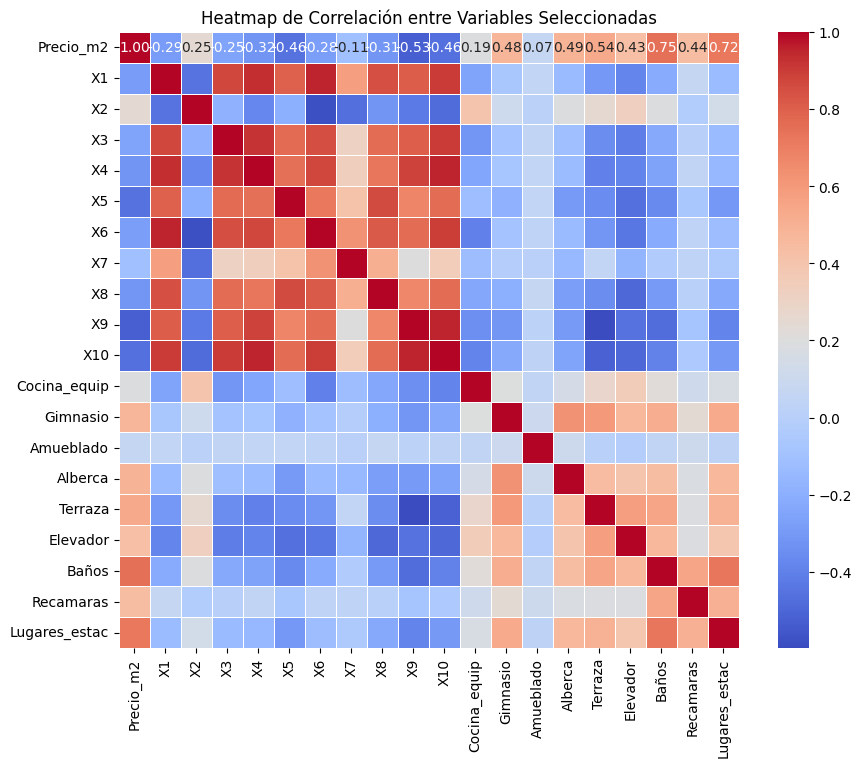

In [5]:
#Modelo 3 (Con correlaciones más altas)
data_selected = inmu[["Precio_m2", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
# 
# Calcula la matriz de correlación
correlation_matrix = data_selected.corr()
# 
# Crea el heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap de Correlación entre Variables Seleccionadas")
plt.show()

Vemos que las variables Gimnasio, Alberca, Terraza, Elevador, Baños, Recámaras y Lugares de Estacionamiento tienen las relaciones más fuertes, por lo que serán usadas en el siguiente modelo:

In [6]:
model = LinearRegression()
type(model)

x = inmu[["Gimnasio", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.6483537987961022
Correlación:  0.8052041969563387
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     170.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.01e-142
Time:                        18:32:02   Log-Likelihood:                -6185.2
No. Observations:                 657   AIC:                         1.239e+04
Df Residuals:                     649   BIC:                         1.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

En este observamos una r^2 (eficacia del modelo), del 64%, es servible el modelo e igualmente un AIC y BIC similar a los anteriores. Nuevamente vemos algunas variables no significativas como Elevador y Recámaras, las cuales serán eliminadas para generar un nuevo modelo.

## Modelo 4 (Con significantes de la anterior)

Este último modelo considera las variables significantes del modelo anterior, con el cual obtenemos los siguientes resultados.

In [7]:
#Modelo 4 (Con significantes de la anterior)
model = LinearRegression()
type(model)

x = inmu[["Gimnasio", "Alberca", "Terraza", "Baños", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.6477140502689188
Correlación:  0.8048068403467498
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     239.4
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.59e-145
Time:                        18:32:02   Log-Likelihood:                -6185.8
No. Observations:                 657   AIC:                         1.238e+04
Df Residuals:                     651   BIC:                         1.241e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

El modelo es servible, explica nuevamente el 64% del precio por metro cuadrado de las casas y el BIC y AIC es parecido a los demás.

En conclusión, la elección del modelo de regresión lineal múltiple como punto de referencia se basa en su eficacia, evidenciada por un coeficiente de determinación (*R-squared*) del 74%. Este valor proporciona una medida sólida de la capacidad del modelo para explicar la variabilidad en los datos. Dado que el R-squared es el más alto entre los modelos considerados, hemos decidido seleccionarlo como el punto de partida para la comparación con otros enfoques, como los modelos de árboles de regresión y redes neuronales. La robustez y la interpretabilidad inherentes a la regresión lineal múltiple respaldan su elección como la primera opción para entender y predecir los precios por metro cuadrado de propiedades en la Ciudad de México.

### **Redes Neuronales ANN**
### Modelo 1

In [8]:
X = inmu[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=19))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')




Epoch 1/100

15/15 [==============================] - 1s 17ms/step - loss: 44937016.0000 - val_loss: 37584800.0000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 44919880.0000 - val_loss: 37570172.0000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 44896520.0000 - val_loss: 37549820.0000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 44862580.0000 - val_loss: 37518408.0000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 44807908.0000 - val_loss: 37470024.0000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 44721764.0000 - val_loss: 37398060.0000
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 44591236.0000 - val_loss: 37295380.0000
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 44406796.0000 - val_loss: 37147580.0000
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 44155108.0000 - val

### Modelo 2

In [9]:
X = inmu[["X2", "X3", "X5","X8", "X10", "Alberca", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=9))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')


Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 44938388.0000 - val_loss: 37587044.0000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 44924908.0000 - val_loss: 37575784.0000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 44906532.0000 - val_loss: 37561044.0000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 44881472.0000 - val_loss: 37539476.0000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 44844092.0000 - val_loss: 37507288.0000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 44788520.0000 - val_loss: 37459000.0000
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 44703284.0000 - val_loss: 37389064.0000
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 44578512.0000 - val_loss: 37294180.0000
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 44420048.0000 - val_lo

### Modelo 3

In [10]:
X = inmu[["Gimnasio", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=7))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')


Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 44940856.0000 - val_loss: 37589208.0000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 44926960.0000 - val_loss: 37577228.0000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 44910084.0000 - val_loss: 37561352.0000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 44886076.0000 - val_loss: 37538092.0000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 44849628.0000 - val_loss: 37503272.0000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 44796692.0000 - val_loss: 37449548.0000
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 44718736.0000 - val_loss: 37372316.0000
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 44602524.0000 - val_loss: 37262876.0000
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 44442248.0000 - val_lo

### Modelo 4

In [11]:
X = inmu[["Gimnasio", "Alberca", "Terraza", "Baños", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=5))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')


Epoch 1/100
15/15 [==============================] - 1s 22ms/step - loss: 44938840.0000 - val_loss: 37587492.0000
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 44927740.0000 - val_loss: 37576696.0000
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 44913180.0000 - val_loss: 37563412.0000
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 44894916.0000 - val_loss: 37544036.0000
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 44868380.0000 - val_loss: 37516540.0000
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 44826988.0000 - val_loss: 37479388.0000
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 44774244.0000 - val_loss: 37423708.0000
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 44698952.0000 - val_loss: 37349028.0000
Epoch 9/100
15/15 [==============================] - 0s 10ms/step - loss: 44594656.0000 - val_l

### Modelo 5 (Este es el mejor)

Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 44938288.0000 - val_loss: 37588800.0000
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 44930624.0000 - val_loss: 37581840.0000
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 44921016.0000 - val_loss: 37572728.0000
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 44907488.0000 - val_loss: 37559660.0000
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 44887716.0000 - val_loss: 37540936.0000
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 44862052.0000 - val_loss: 37512408.0000
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 44822540.0000 - val_loss: 37474256.0000
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 44764168.0000 - val_loss: 37423564.0000
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 44695244.0000 - val_lo

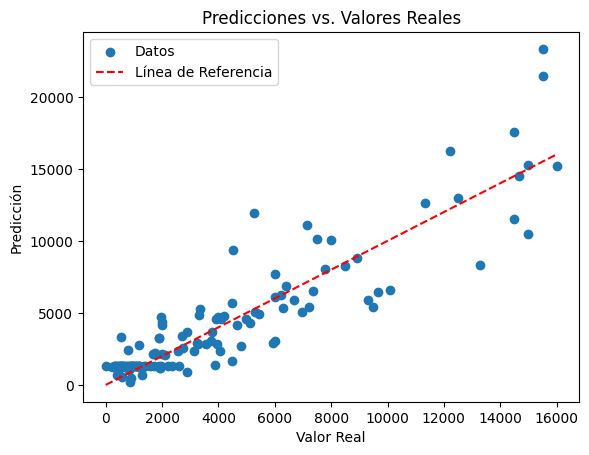

Error Cuadrático Medio (MSE): 3426730.96
Error Absoluto Medio (MAE): 1217.44
Coeficiente de Determinación (R^2): 0.79
 
Media de las Predicciones: 4180.60
Mediana de las Predicciones: 2407.29
Desviación Estándar de las Predicciones: 4337.33
Mínimo de las Predicciones: 180.06
Máximo de las Predicciones: 23323.43
 
Media de datos reales: 4094.68
Mediana de datos reales: 1918.08
Desviación Estándar de datos reales: 5003.91
Mínimo de datos reales: 1.25
Máximo de datos reales: 47200.00


In [13]:
df = inmu

X = df[["m2_construido","Baños","Recamaras","Lugares_estac"]]
y = df["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=4))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Visualizar los resultados de la predicción con la línea de referencia
plt.scatter(y_test, predictions, label='Datos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Línea de Referencia')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

# Calcular estadísticas descriptivas de las predicciones
mean_prediction = np.mean(predictions)
median_prediction = np.median(predictions)
std_dev_prediction = np.std(predictions)
min_prediction = np.min(predictions)
max_prediction = np.max(predictions)

mean_real = np.mean(y)
median_real = np.median(y)
std_dev_real = np.std(y)
min_real= np.min(y)
max_real = np.max(y)

# Mostrar las estadísticas
print(" ")
print(f'Media de las Predicciones: {mean_prediction:.2f}')
print(f'Mediana de las Predicciones: {median_prediction:.2f}')
print(f'Desviación Estándar de las Predicciones: {std_dev_prediction:.2f}')
print(f'Mínimo de las Predicciones: {min_prediction:.2f}')
print(f'Máximo de las Predicciones: {max_prediction:.2f}')

print(" ")
print(f'Media de datos reales: {mean_real:.2f}')
print(f'Mediana de datos reales: {median_real:.2f}')
print(f'Desviación Estándar de datos reales: {std_dev_real:.2f}')
print(f'Mínimo de datos reales: {min_real:.2f}')
print(f'Máximo de datos reales: {max_real:.2f}')

* BBVA. s.f. *¿Cómo saber el valor de una casa?*. BBVA. https://www.bbva.mx/educacion-financiera/blog/como-saber-el-valor-de-una-casa.html#:~:text=Determinar%20el%20valor%20de%20una%20casa%20es%20clave,propiedad%20permanezca%20en%20el%20mercado%20durante%20demasiado%20tiempo.